In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
l = []
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        l.append([os.path.join(dirname,filename),int(dirname=="/kaggle/input/damage_crop")])

In [2]:
df = pd.DataFrame(l,columns = ['path','label'])

In [3]:
df.head()

,path,label
0,/kaggle/input/non_damaged_crop/sugarcane013a.jpeg,0
1,/kaggle/input/non_damaged_crop/maize023a.jpeg,0
2,/kaggle/input/non_damaged_crop/maize013a.jpeg,0
3,/kaggle/input/non_damaged_crop/rice032a.jpeg,0
4,/kaggle/input/non_damaged_crop/rice025a.jpeg,0


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf 
import keras 
from keras.models import Sequential
from keras import layers
from keras.layers import Dense,Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, InputLayer
import cv2
import random
import PIL.Image as Image 
from sklearn.model_selection import train_test_split
np.random.seed(0)

In [5]:
def resize_image(image_array):
    return cv2.resize(image_array,(224,224))
def read_image(image_path):
    return cv2.imread(image_path)
def rescale_image(image_array):
    return image_array*1./255
def preprocess_image(image_path,reshape = True,read=True):
    if(read==True):
        image = read_image(image_path)
    image = resize_image(image)
    image = rescale_image(image)
    if(reshape ==  True):
        image = image.reshape(-1,image.shape[0],image.shape[1],image.shape[2])    
    return image

In [6]:
images = []
for n,i in enumerate(df.path.values):
    print(i)
    try:
        images.append(preprocess_image(i,reshape=False))
    except:
        pd.DataFrame(df, index = [n])
print(images[0])        

/kaggle/input/non_damaged_crop/sugarcane013a.jpeg
/kaggle/input/non_damaged_crop/maize023a.jpeg
/kaggle/input/non_damaged_crop/maize013a.jpeg
/kaggle/input/non_damaged_crop/rice032a.jpeg
/kaggle/input/non_damaged_crop/rice025a.jpeg
/kaggle/input/non_damaged_crop/maize005ahs.jpeg
/kaggle/input/non_damaged_crop/rice029a.jpeg
/kaggle/input/non_damaged_crop/maize022ahs.jpeg
/kaggle/input/non_damaged_crop/maize027a.jpeg
/kaggle/input/non_damaged_crop/maize011ahf.jpeg
/kaggle/input/non_damaged_crop/maize030ahf.jpeg
/kaggle/input/non_damaged_crop/maize025ahf.jpeg
/kaggle/input/non_damaged_crop/sugarcane015a.jpeg
/kaggle/input/non_damaged_crop/maize020ahf.jpeg
/kaggle/input/non_damaged_crop/maize012ahf.jpeg
/kaggle/input/non_damaged_crop/maize017ahf.jpeg
/kaggle/input/non_damaged_crop/maize021a.jpeg
/kaggle/input/non_damaged_crop/maize006hs.jpeg
/kaggle/input/non_damaged_crop/rice037a.jpeg
/kaggle/input/non_damaged_crop/rice007a.jpeg
/kaggle/input/non_damaged_crop/maize002ahf.jpeg
/kaggle/inpu

In [7]:
images = np.array(images)

In [8]:
images.shape

(73, 224, 224, 3)

In [9]:

def build_model():
    keras.backend.clear_session()
    vgg = keras.applications.VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet',pooling='avg')
    vgg.trainable=False
    vggmodel = keras.Sequential([vgg
                             ,Dense(220,activation='relu'),Dense(220,activation='relu'),Dense(1,activation='sigmoid')])

    vggmodel.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics=['accuracy'])
    
  
    
    return vggmodel

In [10]:
model = build_model()

58892288/58889256 [==============================] - 1s 0us/step


In [11]:
print(model.input_shape)
print(model.output_shape)

(None, 224, 224, 3)
(None, 1)


In [12]:
labels = df.label.values
labels = labels.reshape(-1,1)

In [13]:
hist = model.fit(images,labels,epochs=25,validation_split=0.2)

Epoch 1/25
2/2 [==============================] - 1s 746ms/step - loss: 0.6132 - accuracy: 0.7069 - val_loss: 1.4781 - val_accuracy: 0.0000e+00
Epoch 2/25
2/2 [==============================] - 0s 85ms/step - loss: 0.5909 - accuracy: 0.7069 - val_loss: 1.2919 - val_accuracy: 0.0000e+00
Epoch 3/25
2/2 [==============================] - 0s 82ms/step - loss: 0.5032 - accuracy: 0.7069 - val_loss: 0.7630 - val_accuracy: 0.2667
Epoch 4/25
2/2 [==============================] - 0s 79ms/step - loss: 0.4874 - accuracy: 0.8621 - val_loss: 0.6212 - val_accuracy: 0.6000
Epoch 5/25
2/2 [==============================] - 0s 81ms/step - loss: 0.4464 - accuracy: 0.8966 - val_loss: 0.7956 - val_accuracy: 0.4000
Epoch 6/25
2/2 [==============================] - 0s 80ms/step - loss: 0.3990 - accuracy: 0.8448 - val_loss: 0.9816 - val_accuracy: 0.2667
Epoch 7/25
2/2 [==============================] - 0s 79ms/step - loss: 0.3752 - accuracy: 0.8103 - val_loss: 0.8725 - val_accuracy: 0.4000
Epoch 8/25
2/2 [==

(0.0, 4.0)

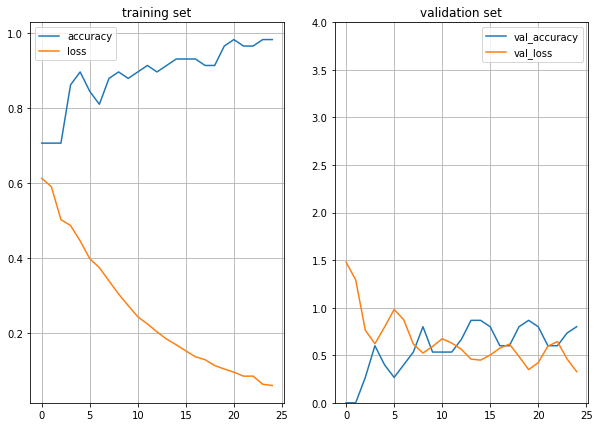

In [14]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'],label='accuracy')
plt.plot(hist.history['loss'],label='loss')
plt.legend()
plt.title("training set")
plt.grid()
plt.subplot(1,2,2)
plt.plot(hist.history['val_accuracy'],label='val_accuracy')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.legend()
plt.title("validation set")
plt.grid()
plt.ylim((0,4))

In [15]:
model.save_weights('floodmodel.h5')

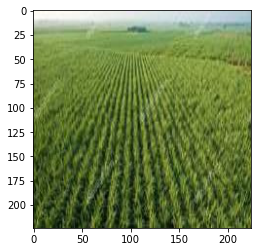

In [16]:
ig = plt.imread(df['path'][0])
plt.imshow(ig)

In [17]:
newimg = preprocess_image(df['path'][0])
print(model.predict(newimg))
print(int(model.predict(newimg)[0][0]>0.5))

[[0.0232233]]
0


* 0 means not damage
* 1 means damage

[[0.8742913]]
1


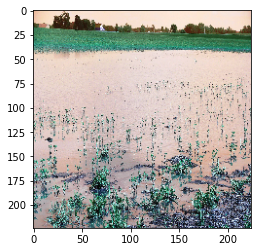

In [18]:
newimg = preprocess_image(df['path'][49])
plt.imshow(newimg[0])
print(model.predict(newimg))
print(int(model.predict(newimg)[0][0]>0.5))

In [19]:
for i in df.path.values:
    try:
        print(int(model.predict(preprocess_image(i))[0]>0.5))
    except:
        pass

0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
0
0
1
1
1
1
1
1
1
